# Параметрические тесты

В предыдущем юните мы рассмотрели методы проверки на нормальность. Она необходима, чтобы выбрать, какие статистические тесты использовать:

* параметрические, если распределение признака нормальное;
* или непараметрические, если распределение признака отлично от нормального или о нём нет информации.

В этом юните мы:

* разберём параметрические тесты, которые упомянули в алгоритме выбора статистического теста для количественных признаков;
* для каждого теста приведём описание функции, которая реализует его в Python-библиотеках, и пример использования на Python.

Примечание. При проведении тестов в этом модуле мы не будем вдаваться в детали расчётов — все они реализованы в библиотеках Python и не выполняются вручную. Задача специалиста по Data Science — понимать область применения каждого из тестов и уметь интерпретировать их результаты. Детали расчётов можно посмотреть в следующих источниках:

Все функции, которые реализуют параметрические тесты в библиотеках Python:

на вход принимают:

* выборки или их параметры;
* параметры проверяемой гипотезы;

на выход отдают:

* уровень значимости p (p-value);
* дополнительные параметры (в большинстве случаев они нам не нужны).

Предполагается, что в примерах из этого юнита все данные распределены нормально. Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.



## ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий (t-test) используют, чтобы сравнить среднее значение признака с его заданным значением.

Одновыборочный t-критерий реализован в функции ttest_1samp() в модуле stats библиотеки scipy.

Основные входные параметры:

* ``a`` — выборочные данные;
* ``popmean`` — ожидаемое среднее значение признака;
* ``alternative`` — вид альтернативной гипотезы:
* ‘``two-sided’`` (двусторонняя, используется по умолчанию);
* ``‘less’`` (левосторонняя);
* ``‘greater’`` (правосторонняя).

Примеры задач, когда может понадобиться использование теста:

* Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
* Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.


### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

**БИЗНЕС-ЗАДАЧА**

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали 40 часов. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

**РЕШЕНИЕ**

Сформулируем гипотезы в математическом виде:

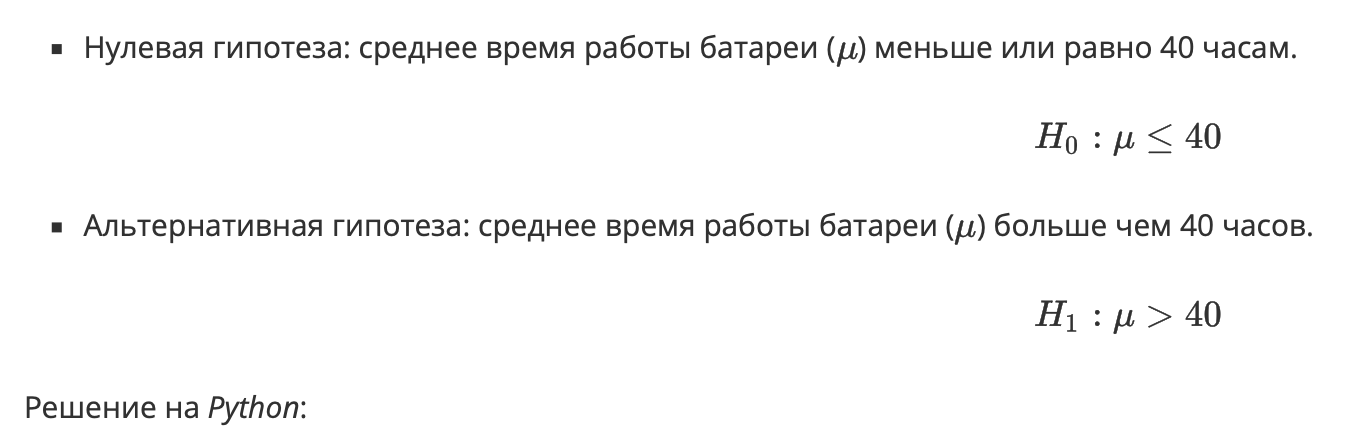

In [8]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.103
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

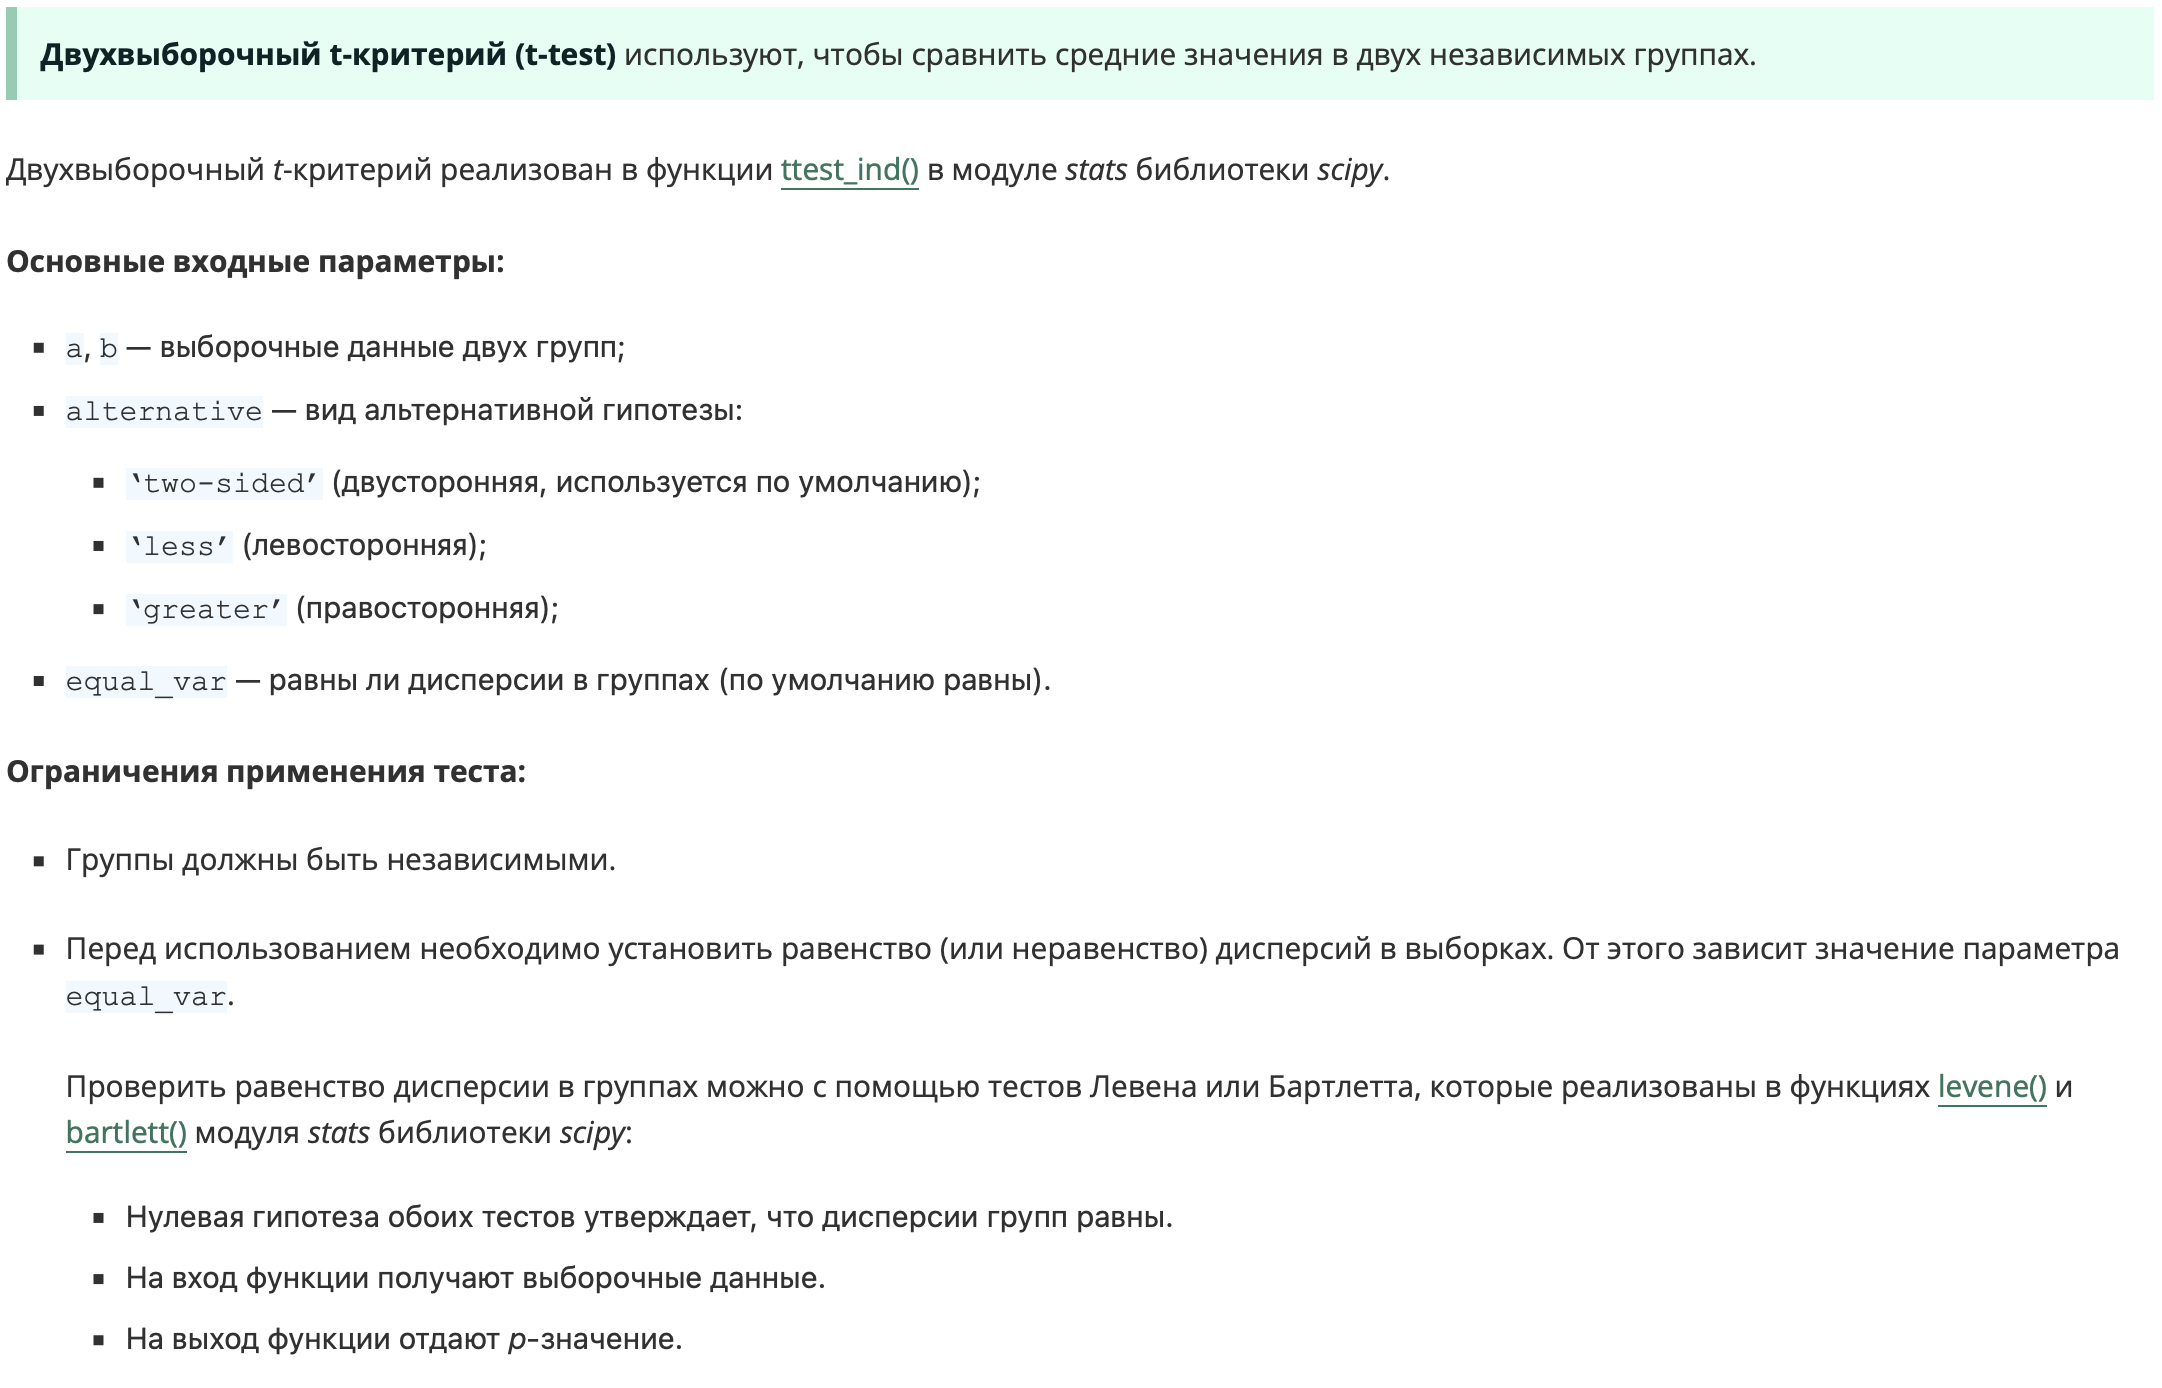

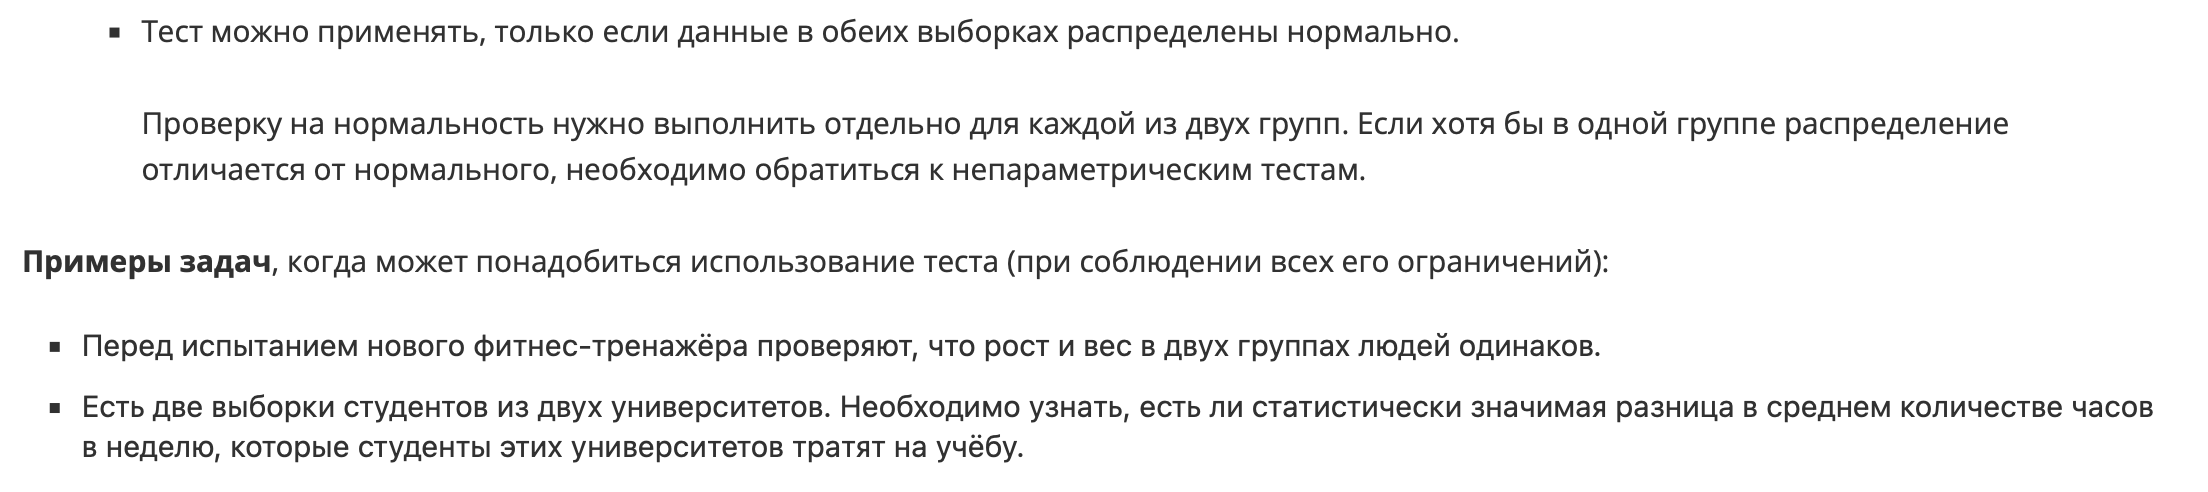

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

**РЕШЕНИЕ**

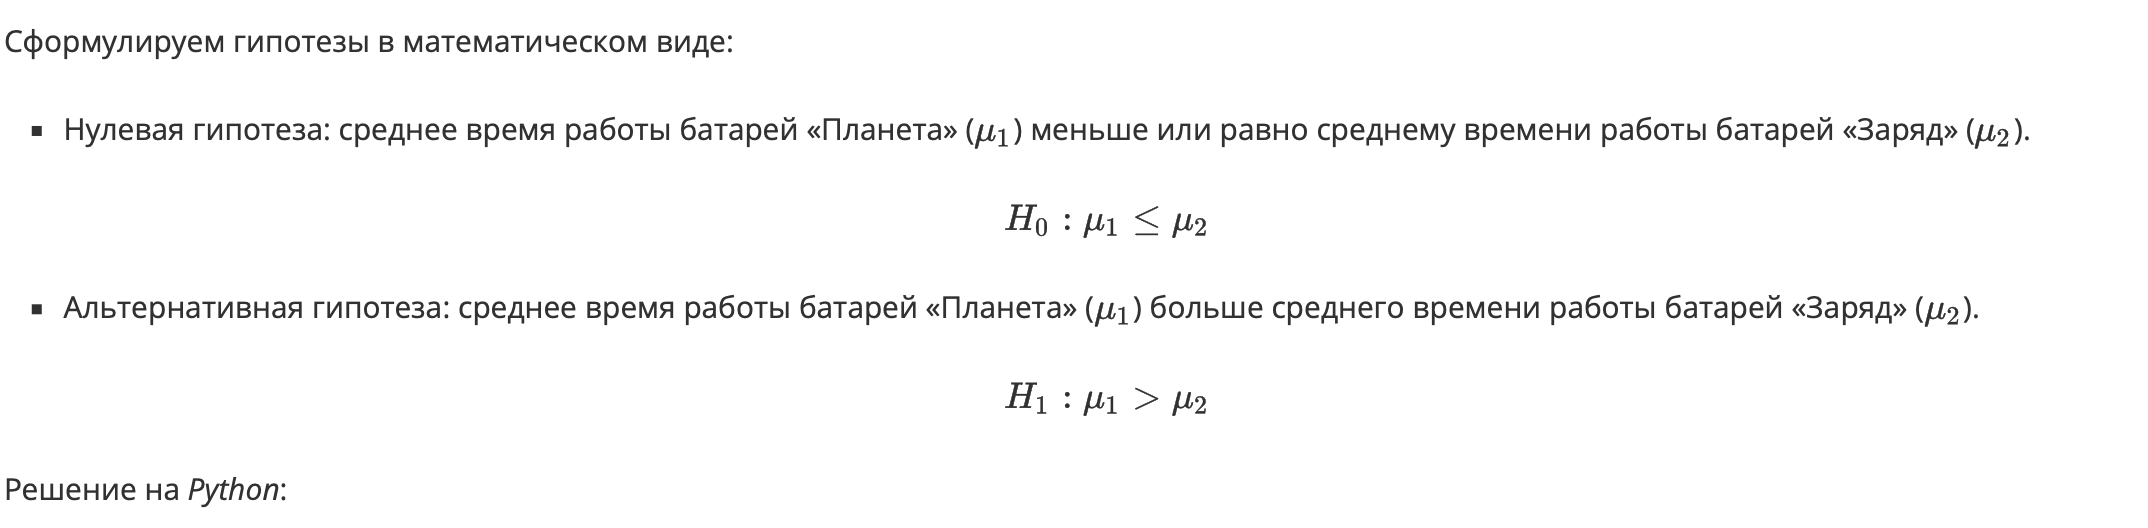

In [9]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_zaryad, data_planeta)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.340
# Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

# Тест на равенство средних
# p-value = 0.260
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


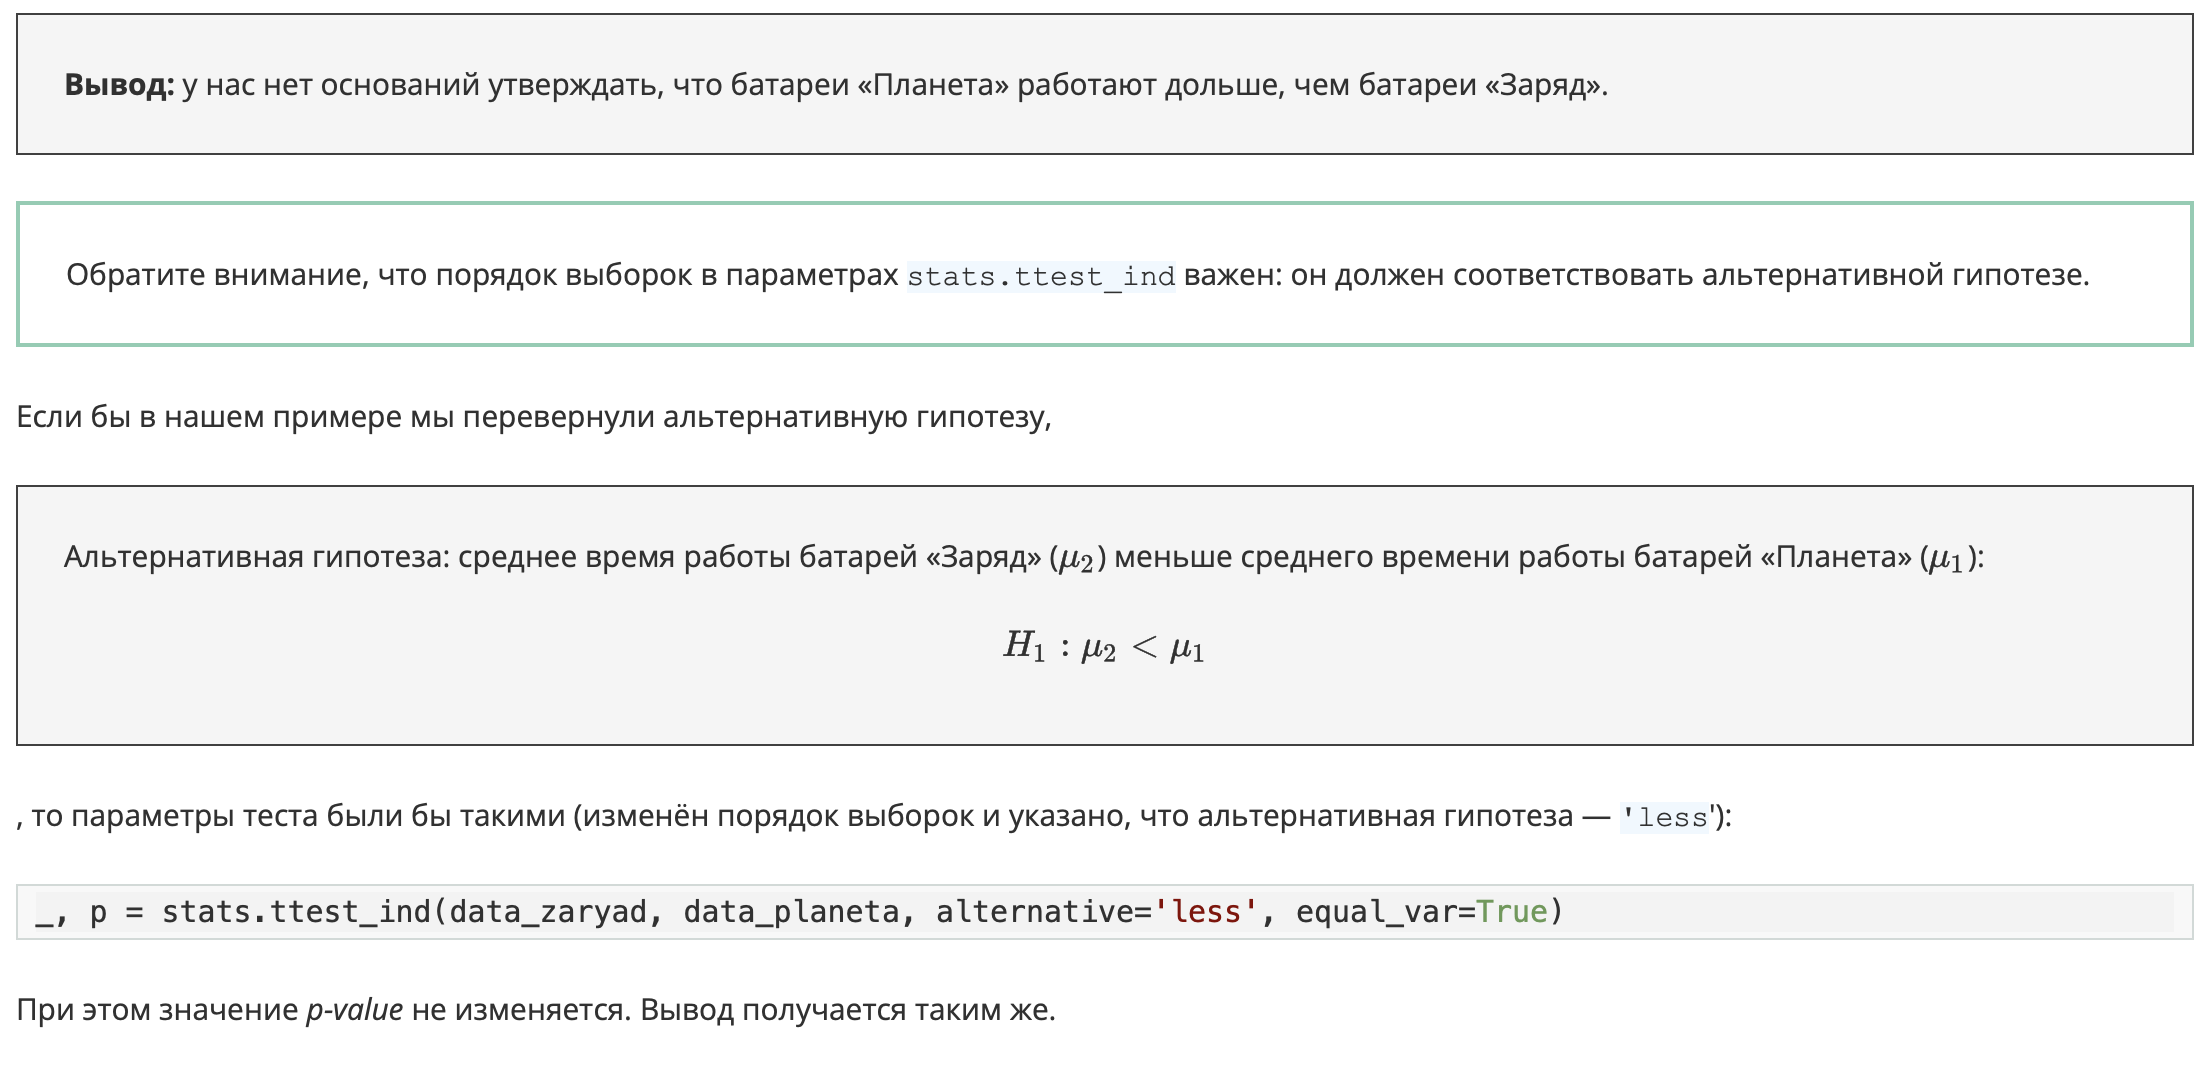

## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Тест ANOVA реализован в функции f_oneway() в модуле stats библиотеки scipy.

**Основные входные параметры:**

``sample1``, ``sample2``, … — выборочные данные групп.

**Ограничения применения теста:**

* Группы должны быть независимыми.
* Тест можно выполнять на группах с равной дисперсией.

  Проверку равенства дисперсий также можно выполнить с помощью тестов Левена или Бартлетта. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.

* Тест можно применять, только если данные в обеих выборках распределены нормально.

  Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач**, когда может понадобиться использование теста (при соблюдении всех его ограничений):

* Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений. В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
* Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты.


### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:

* Батареи «Заряд»: 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.
* Батареи «Планета»: 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.
* Батареи «Энергия»: 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.

**РЕШЕНИЕ**

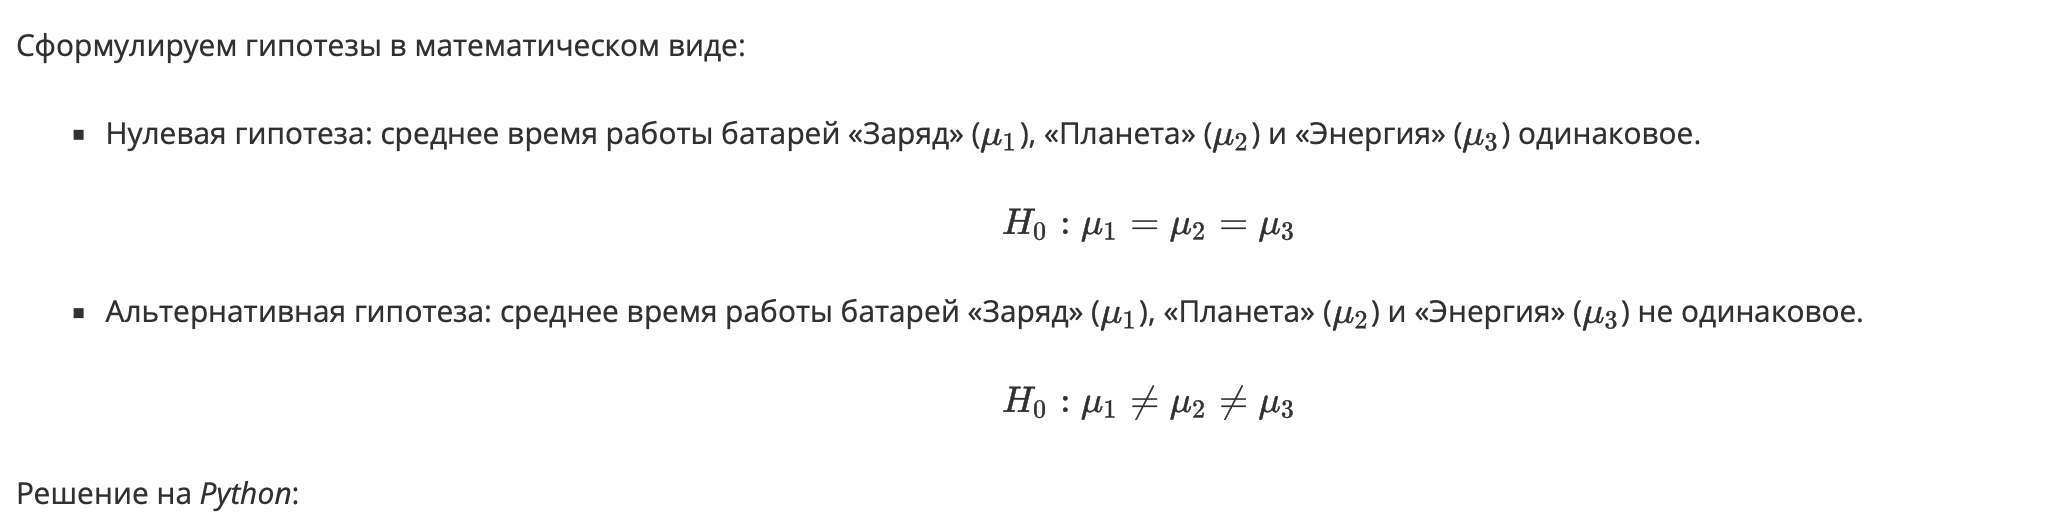


In [10]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Тест на равенство дисперсий
# p-value = 0.303
# Дисперсии одинаковы, мы можем использовать тест ANOVA

# Тест на равенство средних
# p-value = 0.141
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.



## ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Парный t-критерий реализован в функции ttest_rel() в модуле stats библиотеки scipy.

Основные входные параметры:

* ``a``, ``b`` — выборочные данные двух зависимых групп;
* ``alternative`` — вид альтернативной гипотезы:
  ``‘two-sided``’ (двусторонняя, используется по умолчанию);
  ``‘less’`` (левосторонняя);
  ``‘greater’`` (правосторонняя).

**Ограничения применения теста:**

* Тест можно применять, только если данные в обеих выборках распределены нормально.
* Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста:**

* Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса / давления / уровня сахара в крови) одних и тех же пациентов до и после его применения.
* Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 20 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

Батареи «Заряд»: 1, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.
Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

**РЕШЕНИЕ**

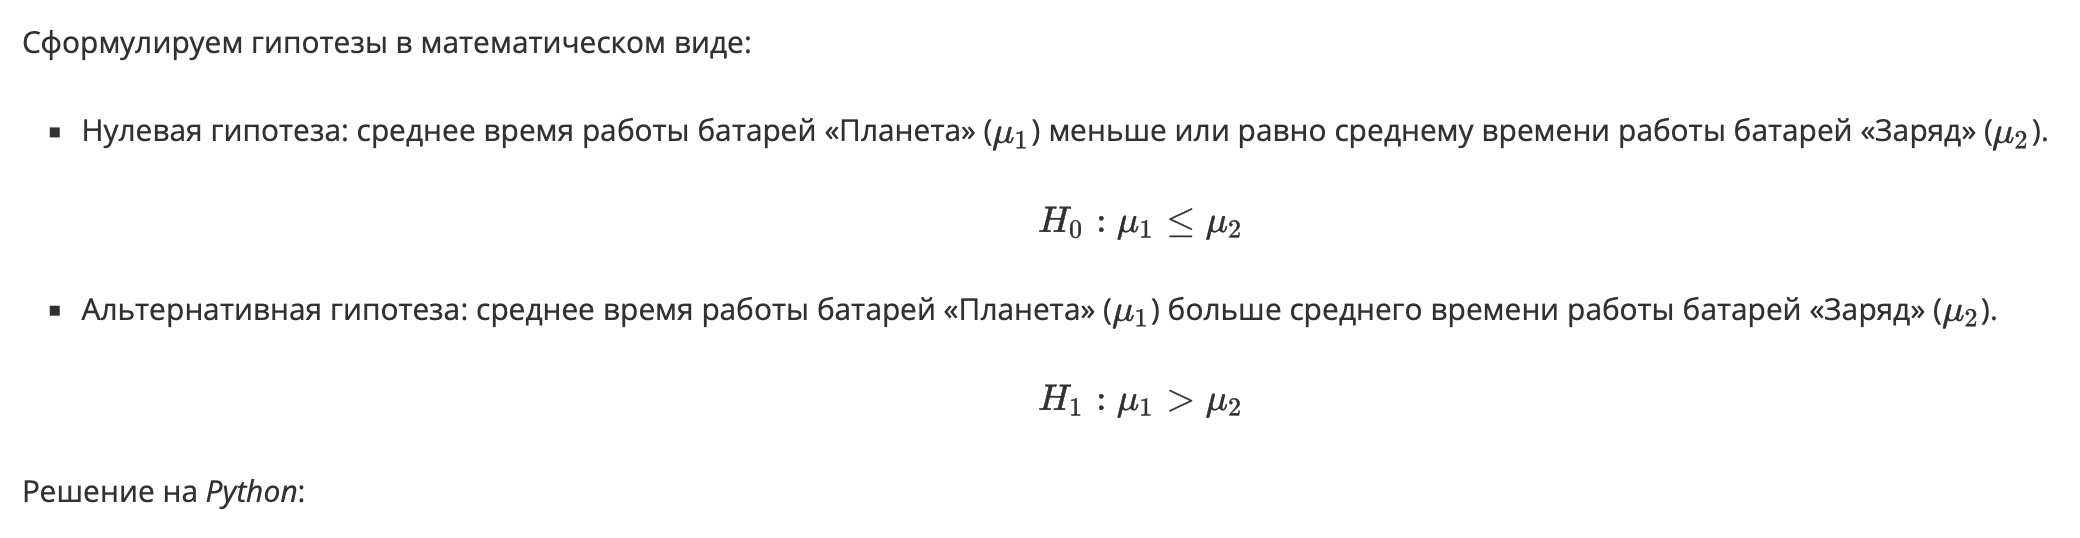


In [11]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
# p-value = 0.023
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: батареи «Планета» работают дольше, чем батареи «Заряд».

## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции AnovaRM() в модуле stats библиотеки statsmodels.

**Основные входные параметры:**

* ``data`` — датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака);
* ``within`` — название колонки с id группы;
* ``subject`` — название колонки с id объекта;
* ``depvar`` — название колонки со значением признака.

**Ограничения применения теста:**

Тест можно применять, только если данные в обеих выборках распределены нормально.

Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

**Примеры задач, когда может понадобиться использование теста:**

Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов — более двух).
Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.

### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

**БИЗНЕС-ЗАДАЧА**

Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.

Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На каждом из устройств замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:

* Батареи «Заряд»: 36, 45, 41, 41, 35.
* Батареи «Планета»: 32, 34, 42, 48, 43.
* Батареи «Энергия»: 41, 39, 35, 34, 52.

**РЕШЕНИЕ**

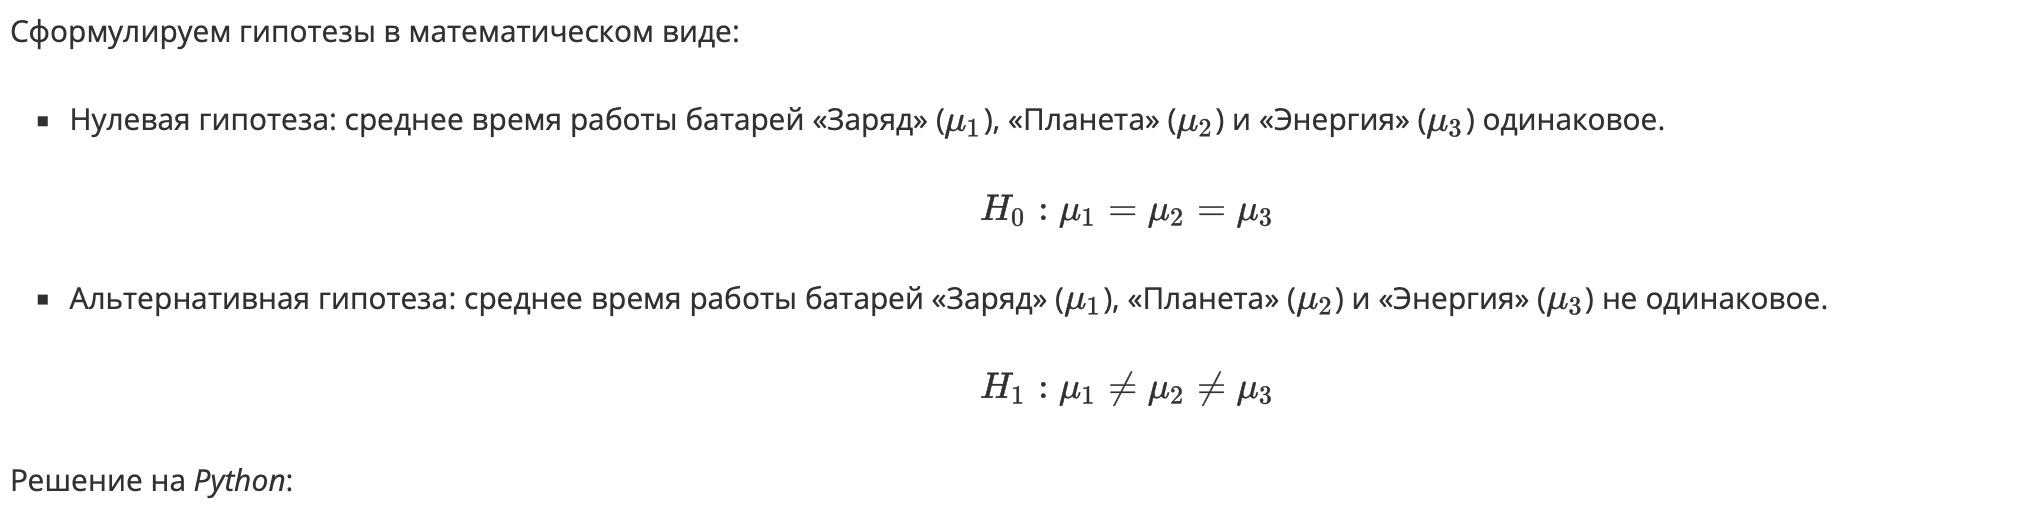

In [12]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})

data

,group,object_id,value
0,Заряд,1,36
1,Заряд,2,45
2,Заряд,3,41
3,Заряд,4,41
4,Заряд,5,35
5,Планета,1,32
6,Планета,2,34
7,Планета,3,42
8,Планета,4,48
9,Планета,5,43


In [13]:
# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратите внимание, что для использования теста необходимо вызвать метод fit(). Формат информации, который возвращает функция AnovaRM(), сильно отличается от ранее рассмотренных тестов: p-value отображается в колонке Pr > F.

В нашем примере p-значение равно 0.99. P-значение больше, чем заданный уровень значимости 0.05. Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

Добавим все рассмотренные функции в наш алгоритм выбора теста (сохраните схему на свой компьютер, чтобы рассмотреть её детально):

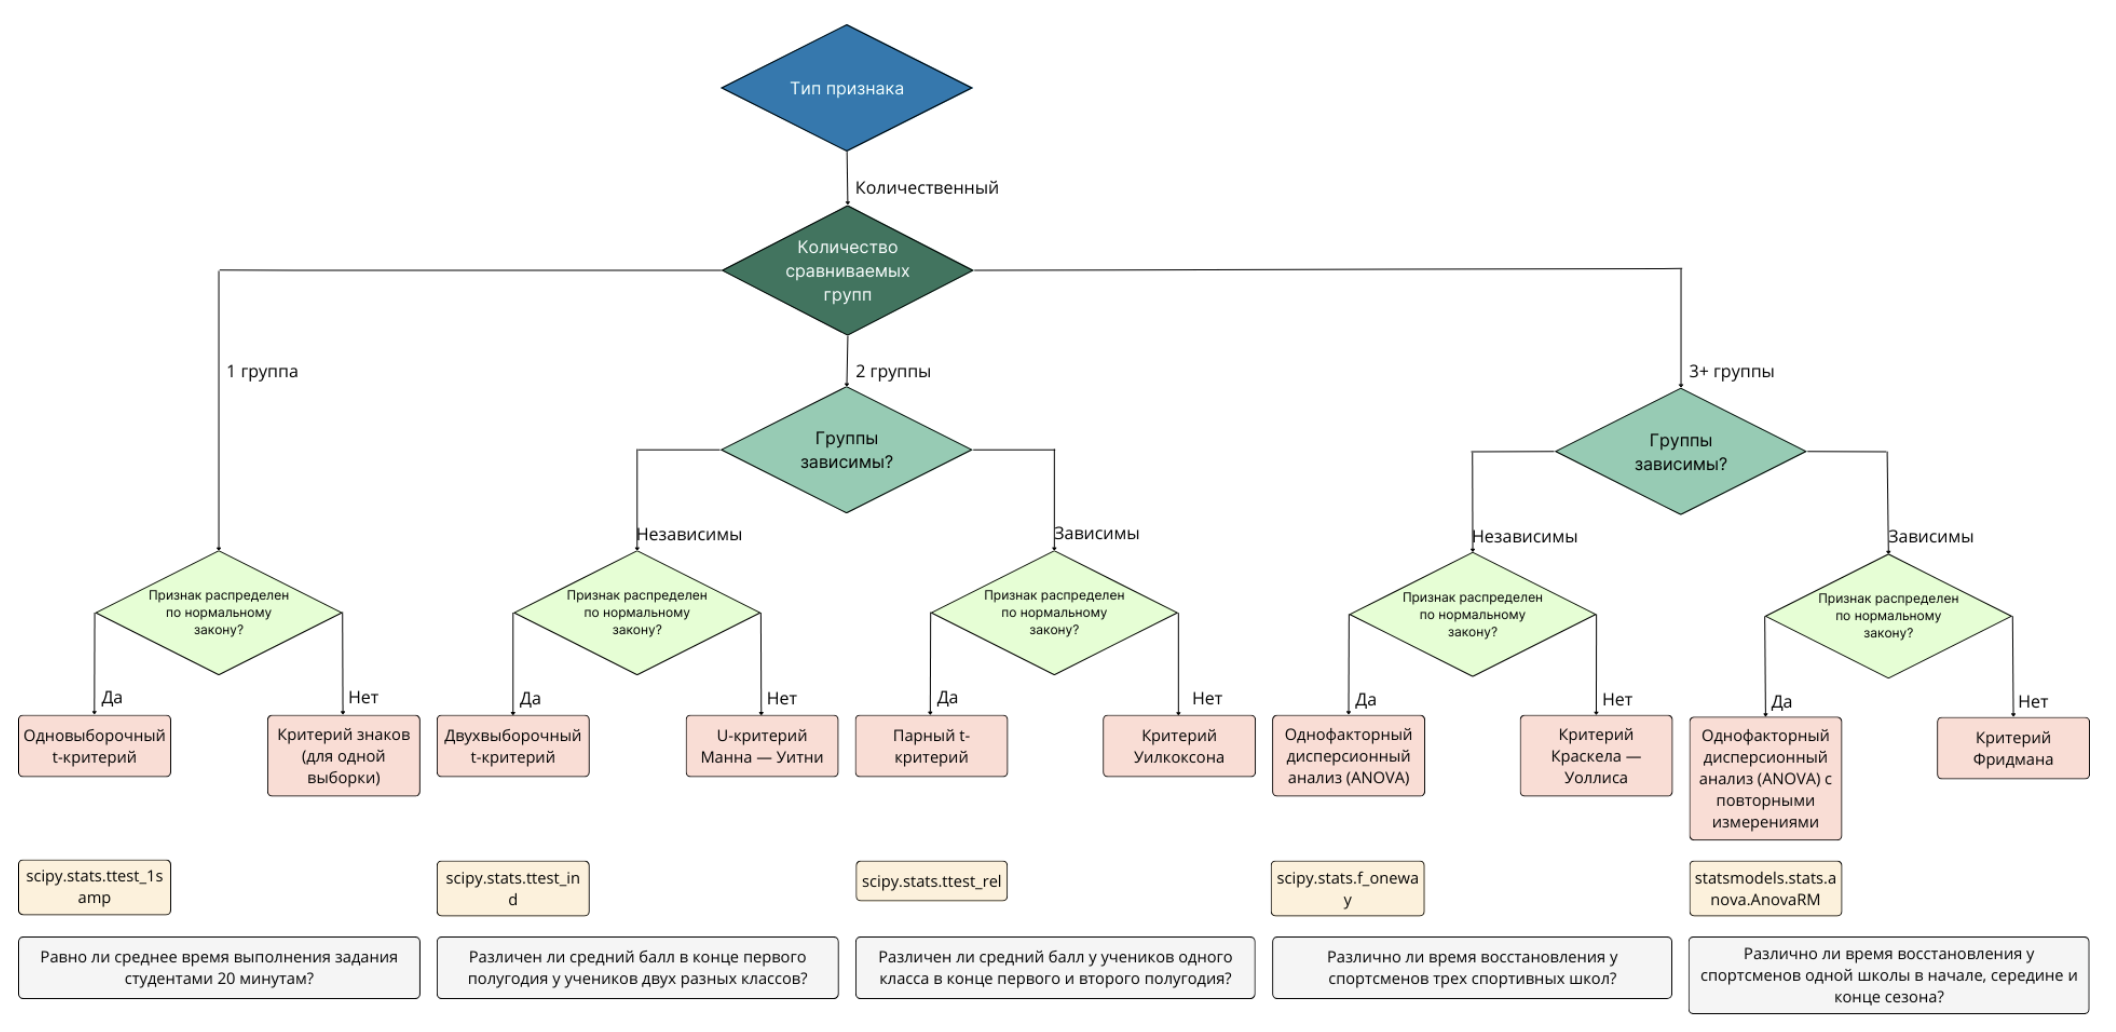